# 1. Occupations

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2: Import the dataset from the given address
# Step 3: Assign it to a variable called users
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
print("Columns:", users.columns.to_list())

Columns: ['user_id', 'age', 'gender', 'occupation', 'zip_code']


In [3]:
# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age_per_occupation)

Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [4]:
# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
# Calculate the count of males per occupation
male_counts = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()

# Calculate the total count per occupation
total_counts = users.groupby('occupation')['gender'].count()

# Calculate the male ratio
male_ratio = male_counts / total_counts

# Sort the male ratio in descending order
male_ratio_sorted = male_ratio.sort_values(ascending=False)
print("Male ratio per occupation (sorted):\n", male_ratio_sorted)

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [5]:
# Step 6: For each occupation, calculate the minimum and maximum ages
age_min_max = users.groupby('occupation')['age'].agg(['min', 'max'])
print("Minimum and maximum ages per occupation:\n", age_min_max)

Minimum and maximum ages per occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [6]:
# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age per occupation and gender:\n", mean_age_occupation_sex)

Mean age per occupation and gender:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028

In [7]:
# Step 8: For each occupation, present the percentage of women and men
# Calculate the count of males and females per occupation
gender_counts = users.groupby(['occupation', 'gender'])['user_id'].count().unstack(fill_value=0)

# Calculate the total per occupation
total_per_occupation = gender_counts.sum(axis=1)

# Calculate the percentage of men and women
percentage_men = (gender_counts['M'] / total_per_occupation) * 100
percentage_women = (gender_counts['F'] / total_per_occupation) * 100

# Combine into a DataFrame
percentage_df = pd.DataFrame({
    'Men': percentage_men,
    'Women': percentage_women
})

print("Percentage of men and women per occupation:\n", percentage_df)

Percentage of men and women per occupation:
                       Men      Women
occupation                          
administrator   54.430380  45.569620
artist          53.571429  46.428571
doctor         100.000000   0.000000
educator        72.631579  27.368421
engineer        97.014925   2.985075
entertainment   88.888889  11.111111
executive       90.625000   9.375000
healthcare      31.250000  68.750000
homemaker       14.285714  85.714286
lawyer          83.333333  16.666667
librarian       43.137255  56.862745
marketing       61.538462  38.461538
none            55.555556  44.444444
other           65.714286  34.285714
programmer      90.909091   9.090909
retired         92.857143   7.142857
salesman        75.000000  25.000000
scientist       90.322581   9.677419
student         69.387755  30.612245
technician      96.296296   3.703704
writer          57.777778  42.222222


# 2. Euro Teams

In [8]:
# Step 1: Import necessary libraries
import pandas as pd

In [9]:
# Step 2: Import the dataset from the given address
# Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [10]:
# Step 4: Select only the Goals column
goals_column = euro12['Goals']
goals_column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [11]:
# Step 5: How many teams participated in the Euro2012?
number_of_teams = euro12['Team'].nunique()
print("Number of teams participated:", number_of_teams)

Number of teams participated: 16


In [12]:
# Step 6: What is the number of columns in the dataset?
number_of_columns = euro12.shape[1]
print("Number of columns in the dataset:", number_of_columns)

Number of columns in the dataset: 35


In [13]:
# Step 7: View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
# Step 8: Sort the teams by Red Cards, then to Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
discipline_sorted

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [15]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards per Team:", mean_yellow_cards)

Mean Yellow Cards per Team: 7.4375


In [16]:
# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("Teams with more than 6 goals:\n", teams_more_than_6_goals)

Teams with more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13 

In [17]:
# Step 11: Select the teams that start with G
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
print("Teams with names starting with 'G':\n", teams_starting_with_g)

Teams with names starting with 'G':
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6          

In [18]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("First 7 columns:\n", first_7_columns)

First 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [19]:
# Step 13: Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]
print("All columns except last 3:\n", all_columns_except_last_3)

All columns except last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13    

In [20]:
# Step 14: Present only the Shooting Accuracy from England, Italy and Russia
teams_of_interest = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(teams_of_interest)]['Shooting Accuracy']
print("Shooting Accuracy of selected teams:\n", shooting_accuracy_selected_teams)

Shooting Accuracy of selected teams:
 3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object


# 3. Housing

In [21]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd

In [22]:
# Step 2: Create three different Series
# Series 1: Random numbers from 1 to 4
bedrs = pd.Series(np.random.randint(1, 5, size=100))
bedrs

0     4
1     4
2     2
3     2
4     4
     ..
95    1
96    3
97    2
98    3
99    1
Length: 100, dtype: int64

In [23]:
# Series 2: Random numbers from 1 to 3
bathrs = pd.Series(np.random.randint(1, 4, size=100))
bathrs

0     1
1     2
2     1
3     3
4     3
     ..
95    2
96    2
97    2
98    2
99    1
Length: 100, dtype: int64

In [24]:
# Series 3: Random numbers from 10,000 to 30,000
price_sqr_meter = pd.Series(np.random.randint(10000, 30001, size=100))
price_sqr_meter

0     25050
1     17836
2     18002
3     29720
4     17607
      ...  
95    15490
96    12800
97    20245
98    23269
99    23012
Length: 100, dtype: int64

In [25]:
# Step 3: Create a DataFrame by joining the Series by column
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df3 = pd.DataFrame({'bedrs': bedrs, 'bathrs': bathrs, 'price_sqr_meter': price_sqr_meter})
df3

,bedrs,bathrs,price_sqr_meter
0,4,1,25050
1,4,2,17836
2,2,1,18002
3,2,3,29720
4,4,3,17607
...,...,...,...
95,1,2,15490
96,3,2,12800
97,2,2,20245
98,3,2,23269


In [26]:
# Step 5: Create a one-column DataFrame with the values of the three Series
# Concatenate the Series and NOT reseting the index
bigcol_df = pd.DataFrame(pd.concat([bedrs, bathrs, price_sqr_meter]), columns=['bigcolumn'])
bigcol_df

,bigcolumn
0,4
1,4
2,2
3,2
4,4
...,...
95,15490
96,12800
97,20245
98,23269


In [27]:
# Step 6: Check if the index goes only until 99
print("Current index range for bigcolumn:", bigcol_df.index.min(), "to", bigcol_df.index.max())

Current index range for bigcolumn: 0 to 99


- Actually the index should be from 0 to 299 but it only goes to 99 as I didn't drop the orginal index.

In [28]:
# Step 7: Reindex the DataFrame to go from 0 to 299
# Reindex, ignoring the original index
bigcol_df = bigcol_df.reset_index(drop=True)

print("New index range for bigcolumn:", bigcol_df.index.min(), "to", bigcol_df.index.max())

New index range for bigcolumn: 0 to 299


# 4. Wind Statistics

In [29]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

In [30]:
# Step 2: Import the dataset
# Step 3.1: Assign it to a variable called data
data = pd.read_csv('wind.txt', delim_whitespace=True)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [31]:
# Step 3.2: Replace the first 3 columns by a proper datetime index
date_df = data[['Yr', 'Mo', 'Dy']].copy()
date_df.rename(columns={"Yr": "year", "Mo": "month", "Dy": "day"}, inplace=True)

data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

# Step 4: Fix the year values
def fix_year(year):
    if year < 100:
        return 1900 + year
    else:
        return year

date_df['year'] = date_df['year'].apply(fix_year)
date_df['year']

0       1961
1       1961
2       1961
3       1961
4       1961
        ... 
6569    1978
6570    1978
6571    1978
6572    1978
6573    1978
Name: year, Length: 6574, dtype: int64

In [32]:
# Step 5: Set the right dates as the index
data['Date'] = pd.to_datetime(date_df[["year", "month", "day"]])
data.set_index('Date', inplace=True)

assert data.index.dtype == np.dtype('datetime64[ns]')

In [33]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [34]:
# Step 6: Compute missing values for each location
missing_values = data.isnull().sum()
missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [35]:
# Step 7: Compute total non-missing values
total_non_missing = data.count().sum()
total_non_missing

78857

In [36]:
# Step 8: Calculate mean windspeed over all locations and times
mean_windspeed = data.mean().mean()
mean_windspeed

10.227982360836938

In [37]:
# Step 9: Create DataFrame with min, max, mean, and std for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [38]:
# Step 10: Create DataFrame with min, max, mean, and std for each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [39]:
# Step 11: Average windspeed in January for each location
january_data = data[data.index.month == 1]
january_mean = january_data.mean()
january_mean

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [40]:
# Step 12: Downsample to yearly frequency
yearly = data.resample('Y').mean()
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [41]:
# Step 13: Downsample to monthly frequency
monthly = data.resample('M').mean()
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [42]:
# Step 14: Downsample to weekly frequency
weekly = data.resample('W').mean()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [43]:
# Step 15: Calculate stats for the first 52 weeks
# Assuming the first week starts on January 2, 1961
start_date = data.index.min() + pd.Timedelta('1 day')
weekly_data = data.resample('W', offset=pd.Timedelta('1 day'), origin=start_date).mean()
first_52_weeks = weekly_data.iloc[:52]
week_stats = pd.DataFrame({
    'min': first_52_weeks.min(axis=1),
    'max': first_52_weeks.max(axis=1),
    'mean': first_52_weeks.mean(axis=1),
    'std': first_52_weeks.std(axis=1)
})
week_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.290000,18.500000,13.018182,2.808875
1961-01-08,6.417143,13.541429,9.847659,2.601705
1961-01-15,4.630000,12.468571,8.353214,2.719649
1961-01-22,6.328571,13.204286,9.368413,2.224531
1961-01-29,12.720000,22.530000,16.958095,2.915635
1961-02-05,8.247143,16.827143,11.800357,2.807310
1961-02-12,10.774286,21.832857,15.891548,3.147412
1961-02-19,9.542857,21.167143,13.726825,3.105819
1961-02-26,8.524286,16.304286,12.604286,2.364323


# 5. Chipotle

In [44]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Step 2: Import the dataset from the given address
# Step 3: Assign in to the variable chipo
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep="\t")

In [46]:
# Step 4: See the first 10 entries
print("First 10 entries:")
chipo.head(10)

First 10 entries:


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [47]:
# Step 5: Number of observations in the dataset
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

Number of observations: 4622


In [48]:
# Step 6: Number of columns in the dataset
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [49]:
# Step 7: Print the name of all the columns
print("Column names:", chipo.columns.to_list())

Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [50]:
# Step 8: How is the dataset indexed?
print("Index:", chipo.index)
print("Min index:", chipo.index.min())
print("Max index:", chipo.index.max())

Index: RangeIndex(start=0, stop=4622, step=1)
Min index: 0
Max index: 4621


- It is indexed sequentially from 0 to 4621

In [51]:
# Step 9: Most-ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("Most-ordered item by quantity:", most_ordered_item)

print("Most-ordered item by frequency:", chipo['item_name'].value_counts().index[0])

Most-ordered item by quantity: Chicken Bowl
Most-ordered item by frequency: Chicken Bowl


- Most-ordered item is Chicken Bowl

In [52]:
# Step 10: Number of items ordered for the most-ordered item
quantity_most_ordered = chipo.groupby('item_name')['quantity'].sum().max()
print("Quantity of most-ordered item:", quantity_most_ordered)

Quantity of most-ordered item: 761


In [53]:
# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().idxmax()
print("Most ordered choice description:", most_ordered_choice)

Most ordered choice description: [Diet Coke]


In [54]:
# Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [55]:
# Step 13: Turn 'item_price' into a float
# Step 13a: Check the item price type
print("Item price type before conversion:", chipo['item_price'].dtype)

Item price type before conversion: object


In [56]:
# Step 13b: Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '')))
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [57]:
# Step 13c: Check the item price type after conversion
print("Item price type after conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64


In [58]:
# Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue: $", revenue)

Total revenue: $ 39237.02


In [59]:
# Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
print("Number of orders made:", num_orders)

Number of orders made: 1834


In [60]:
# Step 16: Average revenue per order
average_revenue_per_order = revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39423118865867


In [61]:
# Step 17: Different items sold
different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", different_items_sold)

Number of different items sold: 50


# 6

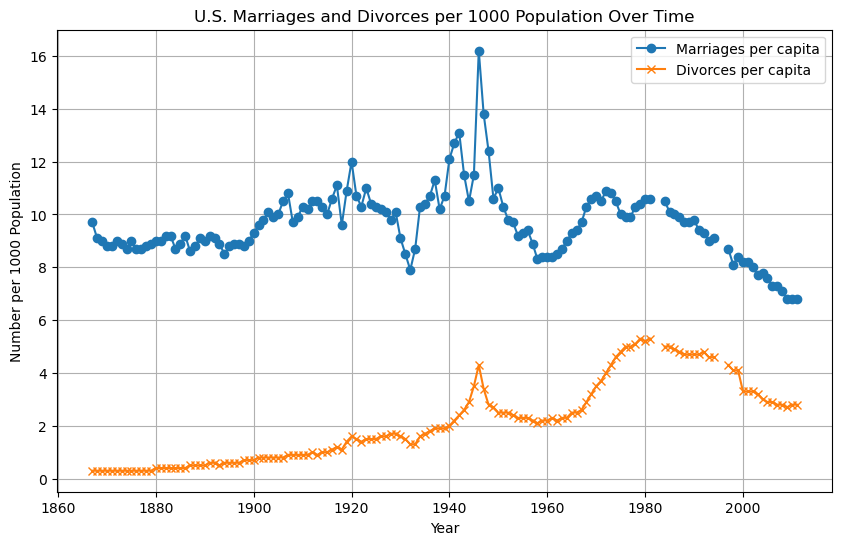

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
marriage_divorce_df = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col='Year')

# Extract the years for the x-axis
years = marriage_divorce_df.index

# Extract the marriages and divorces per capita population
marriages_per_1000 = marriage_divorce_df['Marriages_per_1000']
divorces_per_1000 = marriage_divorce_df['Divorces_per_1000']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot marriages per 1000
plt.plot(years, marriages_per_1000, label='Marriages per capita', marker='o')

# Plot divorces per 1000
plt.plot(years, divorces_per_1000, label='Divorces per capita', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000 Population')
plt.title('U.S. Marriages and Divorces per 1000 Population Over Time')

# Add legend
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

# 7. U.S. Marriages Vs Divorces

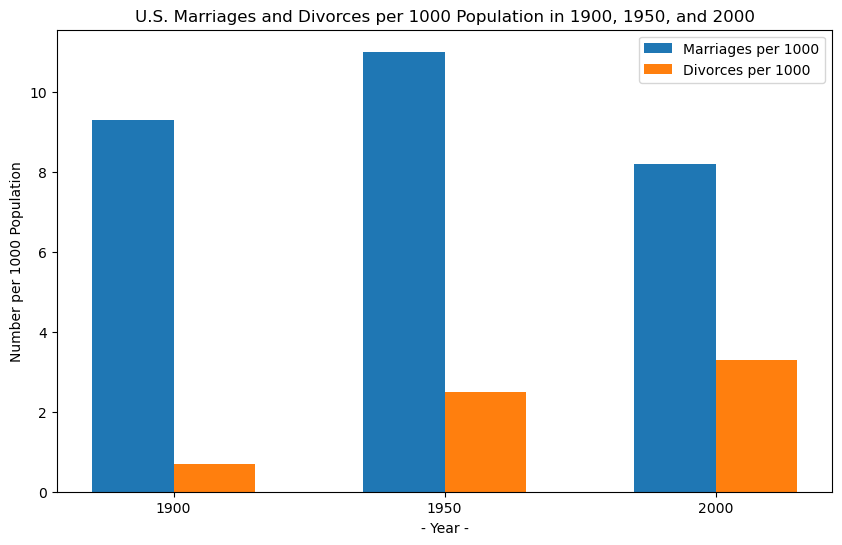

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data for 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
selected_data = marriage_divorce_df.loc[selected_years]

# Prepare data for plotting
marriages = selected_data['Marriages_per_1000']
divorces = selected_data['Divorces_per_1000']

# Set the positions and width for the bars
years = selected_years
width = 15  # Width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for marriages and divorces
ax.bar(years, marriages, width, label='Marriages per 1000')
ax.bar([year + width for year in years], divorces, width, label='Divorces per 1000')

# Add labels and title
ax.set_xlabel('- Year -')
ax.set_ylabel('Number per 1000 Population')
ax.set_title('U.S. Marriages and Divorces per 1000 Population in 1900, 1950, and 2000')
ax.set_xticks([year + width/2 for year in years])
ax.set_xticklabels(['1900', '1950', '2000'])
ax.legend()

# Display the plot
plt.show()

# 8. Deadliest actors in Hollywood

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
actors_data = pd.read_csv('actor_kill_counts.csv')

# Step 2: Sort the data by kill count descending
sorted_actors = actors_data.sort_values(by='Count', ascending=False)
sorted_actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


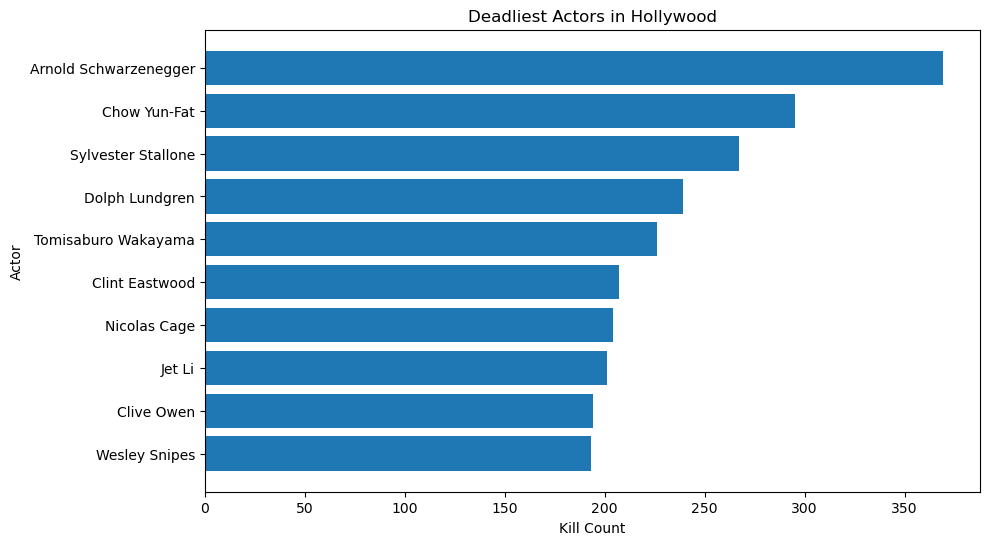

In [65]:
# Step 3: Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_actors['Actor'], sorted_actors['Count'])

plt.gca().invert_yaxis()  # Invert y-axis to show highest kill count at the top

# Step 4: Label the axes and add title
plt.ylabel('Actor')
plt.xlabel('Kill Count')
plt.title('Deadliest Actors in Hollywood')

# Step 5: Display the plot
plt.show()

# 9. Roman Emperors

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rom_emp_df = pd.read_csv('roman-emperor-reigns.csv')

# Explore unique values in 'Cause_of_Death' column
rom_emp_df['Cause_of_Death'].unique()

array(['Possibly assassinated', 'Assassinated', 'Suicide',
       'Natural causes', 'Illness', 'Executed', 'Killed in battle',
       'Died in captivity'], dtype=object)

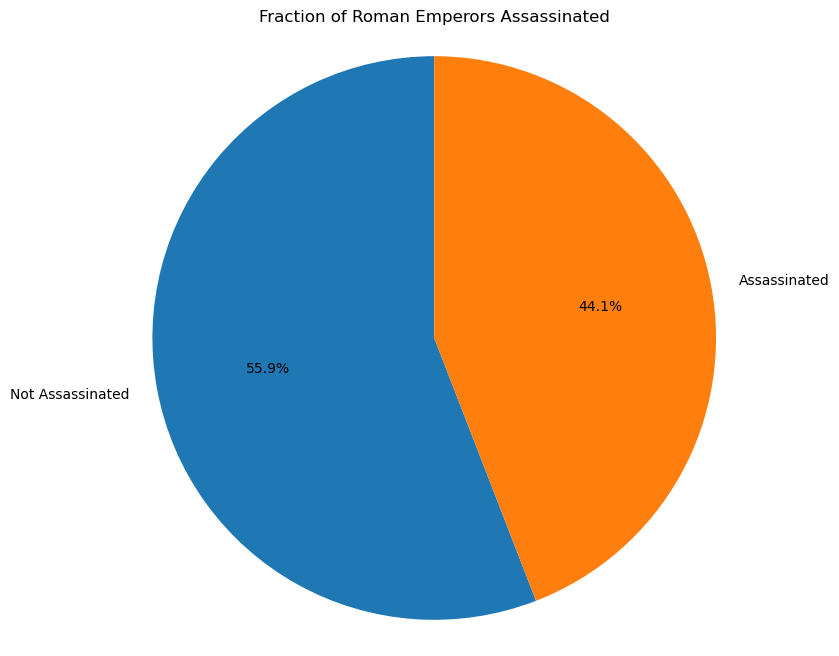

In [67]:
# Categorize emperors into 'Assassinated' and 'Not Assassinated'
# Consider 'Assassinated' and 'Possibly assassinated' as 'Assassinated'
rom_emp_df['Assassination_Status'] = rom_emp_df['Cause_of_Death'].str.lower().apply(
    lambda x: 'Assassinated' if 'assassinated' in x else 'Not Assassinated'
)

# Count the number in each category
assassination_counts = rom_emp_df['Assassination_Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(assassination_counts, labels=assassination_counts.index, autopct='%1.1f%%', startangle=90)

# Ensure the pie chart is a circle
plt.axis('equal')

# Add a title
plt.title('Fraction of Roman Emperors Assassinated')

# Display the chart
plt.show()

# 10. Arcade revenue Vs C.S. PhDs in U.S.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the data
rev_phd_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Sort data by year
rev_phd_data = rev_phd_data.sort_values('Year')
rev_phd_data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


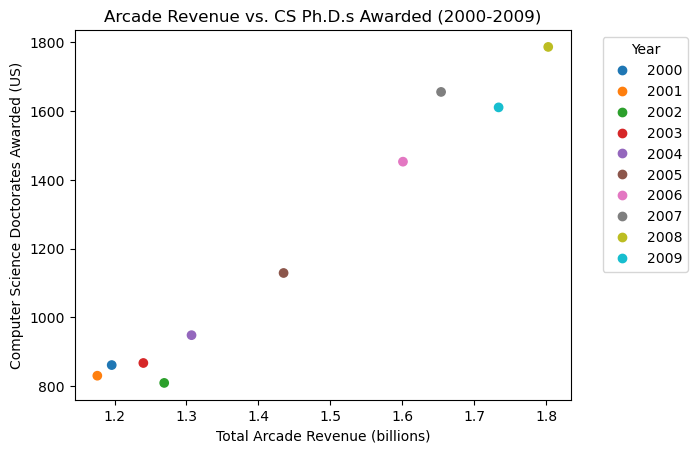

In [69]:
# Prepare data for plotting
x = rev_phd_data['Total Arcade Revenue (billions)']
y = rev_phd_data['Computer Science Doctorates Awarded (US)']
years = rev_phd_data['Year'].astype(str)  # Convert years to strings for coloring

# Create a list of unique years and assign a color to each
unique_years = sorted(years.unique())
colors = plt.cm.tab10(range(len(unique_years)))

# Create a dictionary mapping year to color
year_color_map = {year: colors[i] for i, year in enumerate(unique_years)}

# Assign colors to each data point
point_colors = [year_color_map[year] for year in years]

# Create scatter plot
plt.scatter(x, y, c=point_colors)

# Create a legend
patches = [plt.plot([], [], marker='o', color=year_color_map[year], label=year, linestyle='None')[0] for year in unique_years]
plt.legend(handles=patches, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Label axes
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Add title
plt.title('Arcade Revenue vs. CS Ph.D.s Awarded (2000-2009)')

# Display plot
plt.show()